In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import Classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import SteamVariables as sv
from importlib import reload

reload(Classification)

dt = pd.read_csv(sv.CSV_PATH, nrows=20000) # nrows=2000000
pd.set_option('display.max_columns', None)

# Eliminar colunas desnecessarias
dt.drop(["Unnamed: 0"], axis=1, inplace=True)
dt.drop([sv.STEAM_PURCHASE], axis=1, inplace=True)
dt.drop([sv.WRITTEN_DURING_EARLY_ACCESS], axis=1, inplace=True)
dt.drop([sv.APP_NAME], axis=1, inplace=True)
dt.drop([sv.REVIEW], axis=1, inplace=True)
dt.drop([sv.TIMESTAMP_UPDATED], axis=1, inplace=True)
dt.drop([sv.TIMESTAMP_CREATED], axis=1, inplace=True)
dt.drop([sv.LANGUAGE], axis=1, inplace=True)

# Resetar index
dt.reset_index(drop=True, inplace=True)

# Eliminar linhas com valores nulos
dt[sv.AUTHOR_NUM_GAMES_OWNED].fillna(dt[sv.AUTHOR_NUM_GAMES_OWNED].mean(), inplace=True)
dt[sv.AUTHOR_NUM_REVIEWS].fillna(dt[sv.AUTHOR_NUM_REVIEWS].mean(), inplace=True)
dt[sv.AUTHOR_PLAYTIME_FOREVER].fillna(dt[sv.AUTHOR_PLAYTIME_FOREVER].mean(), inplace=True)
dt[sv.AUTHOR_PLAYTIME_LAST_TWO_WEEKS].fillna(dt[sv.AUTHOR_PLAYTIME_LAST_TWO_WEEKS].mean(), inplace=True)
dt[sv.AUTHOR_LAST_PLAYED].fillna(dt[sv.AUTHOR_LAST_PLAYED].mean(), inplace=True)

# Transformar valores booleanos em inteiros
dt[sv.RECOMMENDED] = dt[sv.RECOMMENDED].map({True: 1, False: 0})


dtTraining = dt.drop(sv.RECOMMENDED, axis=1)
dtTest = dt[sv.RECOMMENDED]
X_train, X_test, Y_train, Y_test = train_test_split(dtTraining, dtTest, test_size=0.3, random_state=5)


In [2]:
myClass = Classification.Classification()

In [3]:
myClass.knn(X_train,Y_train ,X_test, Y_test)

Best parameters are:  {'logistic__C': 100}
Best score is:  0.9705
----------Classification report-----------
              precision    recall  f1-score   support

           0       0.03      1.00      0.05       168
           1       0.00      0.00      0.00      5832

    accuracy                           0.03      6000
   macro avg       0.01      0.50      0.03      6000
weighted avg       0.00      0.03      0.00      6000



c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with

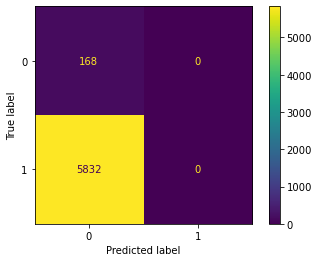

In [ ]:
myClass.logistic(X_train,Y_train ,X_test, Y_test)

Best parameters are:  {'naiveBayes__var_smoothing': 1.0}
Best score is:  0.9595
----------Classification report-----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       168
           1       0.97      1.00      0.99      5832

    accuracy                           0.97      6000
   macro avg       0.49      0.50      0.49      6000
weighted avg       0.94      0.97      0.96      6000



c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


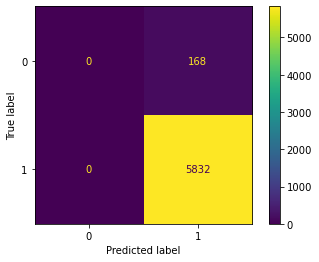

In [ ]:
myClass.naiveBayes(X_train,Y_train ,X_test, Y_test)

Best parameters are:  {'svm__C': 100}
Best score is:  0.9825714285714285
----------Classification report-----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       168
           1       0.97      1.00      0.99      5832

    accuracy                           0.97      6000
   macro avg       0.49      0.50      0.49      6000
weighted avg       0.94      0.97      0.96      6000



c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


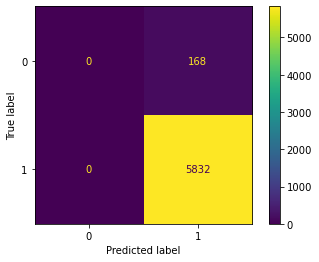

In [ ]:
myClass.svm(X_train,Y_train ,X_test, Y_test)

Best parameters are:  {'decisionTree__max_depth': 7}
Best score is:  0.9839285714285714
----------Classification report-----------
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       168
           1       0.99      0.99      0.99      5832

    accuracy                           0.98      6000
   macro avg       0.86      0.81      0.83      6000
weighted avg       0.98      0.98      0.98      6000



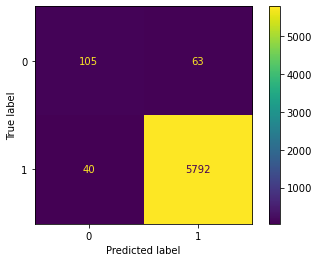

In [ ]:
myClass.decisionTree(X_train,Y_train ,X_test, Y_test)